In [21]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.connectors import SQLConnector
from pandasai import SmartDatalake
import dotenv
import os
import pandas as pd
from lib.etl import DatabaseETL

# Set up environment variables
etl = DatabaseETL('../parameters/config.json')
dotenv.load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

# Select LLM
llm = OpenAI(api_token=api_key)

# Get data from SQL
order_df = etl.read_sql("SELECT  * FROM Orders")
lineitems_df = etl.read_sql("SELECT * FROM LineItems")
customers_df = etl.read_sql("SELECT * FROM Customers")

# Create smart data lake
lake = SmartDatalake(
    [customers_df, order_df],
    config={"llm": llm}
)
lake.chat("How many customers do we have?")

156

In [22]:
customer_ids = customers_df['CustomerId'].unique().tolist()
print(len(customer_ids))

156


In [25]:
lake.chat("Give me top 10 customers with highest orders placed?")

,Customer Name,Order Count
0,Customer_65,3
1,Customer_474,3
2,Customer_274,3
3,Customer_25,3
4,Customer_79,3
5,Customer_436,3
6,Customer_469,2
7,Customer_39,2
8,Customer_314,2
9,Customer_96,2


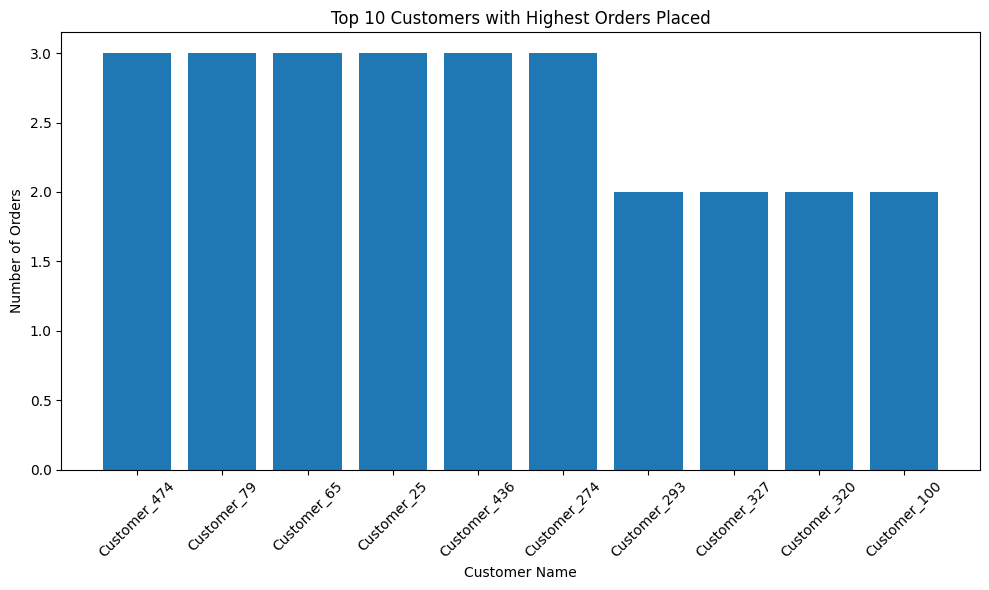

'C:/Users/slavoljub.petkovic/PycharmProjects/Hierarchical-Autonomous-Agent-Swarm/exports/charts/temp_chart.png'

In [26]:
lake.chat("Plot top 10 customers with highest orders placed?")

In [29]:
lake.chat("Give me a timeseries analysis on Orders and provide me summary of the stats?")

,OrderId,CustomerId,Revenue
count,200.000000,200.000000,200.000000
mean,100.500000,74.580000,3029.098450
std,57.879185,43.804655,1731.407868
min,1.000000,1.000000,133.760000
25%,50.750000,36.750000,1603.600000
50%,100.500000,73.000000,2955.485000
75%,150.250000,110.250000,4089.012500
max,200.000000,156.000000,7645.650000
